In [1]:
import pandas as pd
url='/home/miguelamorim/code/MigAmorim/ET_Predictor/raw_data/output_test.csv'
data=pd.read_csv(url)
data

,datetime,duration (seconds),latitude,longitude
0,10/10/1949 20:30,2700.0,29.883056,-97.941111
1,10/10/1956 21:00,20.0,28.978333,-96.645833
2,10/10/1960 20:00,900.0,21.418056,-157.803611
3,10/10/1961 19:00,300.0,36.595000,-82.188889
4,10/10/1965 23:45,1200.0,41.117500,-73.408333
...,...,...,...,...
63982,9/9/2013 21:15,600.0,36.165833,-86.784444
63983,9/9/2013 22:00,1200.0,43.613611,-116.202500
63984,9/9/2013 22:00,1200.0,38.297222,-122.284444
63985,9/9/2013 22:20,5.0,38.901111,-77.265556


**Random Forest**

Mean Squared Error for Latitude (Random Forest): 33.481239464369416
Mean Squared Error for Longitude (Random Forest): 355.38091480649405


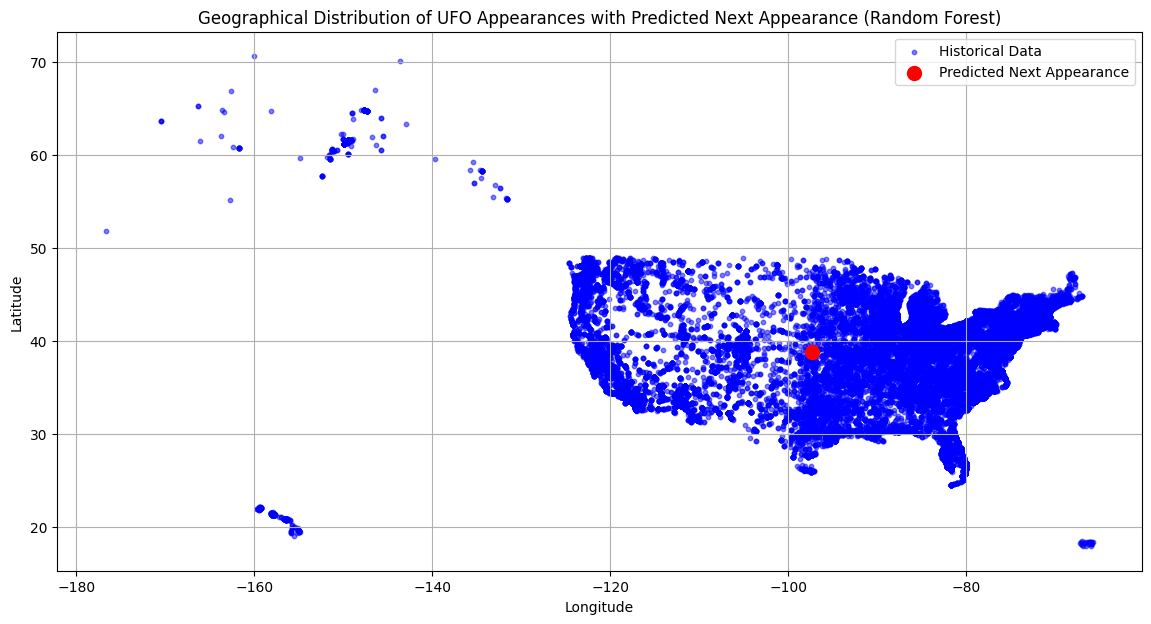

(38.89373610999997, -97.37714027500002)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Convert datetime column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y %H:%M')

# Extract features from datetime
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute

# Select relevant columns
features = data[['year', 'month', 'day', 'hour', 'minute']]
target_latitude = data['latitude']
target_longitude = data['longitude ']

# Drop rows with missing target values if any
data = data.dropna(subset=['latitude', 'longitude '])

# Update features and targets after dropping missing values
features = data[['year', 'month', 'day', 'hour', 'minute']]
target_latitude = data['latitude']
target_longitude = data['longitude ']

# Split the data into training and testing sets
X_train, X_test, y_train_lat, y_test_lat = train_test_split(features, target_latitude, test_size=0.2, random_state=42)
X_train, X_test, y_train_lon, y_test_lon = train_test_split(features, target_longitude, test_size=0.2, random_state=42)

# Train the Random Forest model for latitude
model_lat_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_lat_rf.fit(X_train, y_train_lat)

# Train the Random Forest model for longitude
model_lon_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_lon_rf.fit(X_train, y_train_lon)

# Make predictions
y_pred_lat_rf = model_lat_rf.predict(X_test)
y_pred_lon_rf = model_lon_rf.predict(X_test)

# Evaluate the model
mse_lat_rf = mean_squared_error(y_test_lat, y_pred_lat_rf)
mse_lon_rf = mean_squared_error(y_test_lon, y_pred_lon_rf)

print(f'Mean Squared Error for Latitude (Random Forest): {mse_lat_rf}')
print(f'Mean Squared Error for Longitude (Random Forest): {mse_lon_rf}')

# Get the current date and time
current_datetime = datetime.now()

# Create a new data point with the current date and time
new_data = pd.DataFrame({
    'year': [current_datetime.year],
    'month': [current_datetime.month],
    'day': [current_datetime.day],
    'hour': [current_datetime.hour],
    'minute': [current_datetime.minute]
})

# Predict the latitude and longitude for the new data point
predicted_lat_rf = model_lat_rf.predict(new_data)[0]
predicted_lon_rf = model_lon_rf.predict(new_data)[0]

# Plotting the prediction on the geographical distribution
plt.figure(figsize=(14, 7))
plt.scatter(data['longitude '], data['latitude'], alpha=0.5, c='blue', s=10, label='Historical Data')
plt.scatter(predicted_lon_rf, predicted_lat_rf, color='red', s=100, label='Predicted Next Appearance')
plt.title('Geographical Distribution of UFO Appearances with Predicted Next Appearance (Random Forest)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

predicted_lat_rf, predicted_lon_rf


In [3]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model for latitude
model_lat_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_lat_rf.fit(X_train, y_train_lat)

# Train the Random Forest model for longitude
model_lon_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_lon_rf.fit(X_train, y_train_lon)

# Make predictions
y_pred_lat_rf = model_lat_rf.predict(X_test)
y_pred_lon_rf = model_lon_rf.predict(X_test)

# Evaluate the model
mse_lat_rf = mean_squared_error(y_test_lat, y_pred_lat_rf)
mse_lon_rf = mean_squared_error(y_test_lon, y_pred_lon_rf)

mse_lat_rf, mse_lon_rf


(33.481239464369416, 355.38091480649405)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Convert datetime column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y %H:%M')

# Extract features from datetime
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute

# Select relevant columns
features = data[['year', 'month', 'day', 'hour', 'minute']]
target_latitude = data['latitude']
target_longitude = data['longitude ']

# Drop rows with missing target values if any
data = data.dropna(subset=['latitude', 'longitude '])

# Update features and targets after dropping missing values
features = data[['year', 'month', 'day', 'hour', 'minute']]
target_latitude = data['latitude']
target_longitude = data['longitude ']

# Split the data into training and testing sets
X_train, X_test, y_train_lat, y_test_lat = train_test_split(features, target_latitude, test_size=0.2, random_state=42)
X_train, X_test, y_train_lon, y_test_lon = train_test_split(features, target_longitude, test_size=0.2, random_state=42)

# Train the Random Forest model for latitude
model_lat_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_lat_rf.fit(X_train, y_train_lat)

# Train the Random Forest model for longitude
model_lon_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_lon_rf.fit(X_train, y_train_lon)

# Make predictions
y_pred_lat_rf = model_lat_rf.predict(X_test)
y_pred_lon_rf = model_lon_rf.predict(X_test)

# Evaluate the model
mse_lat_rf = mean_squared_error(y_test_lat, y_pred_lat_rf)
mse_lon_rf = mean_squared_error(y_test_lon, y_pred_lon_rf)

print(f'Mean Squared Error for Latitude (Random Forest): {mse_lat_rf}')
print(f'Mean Squared Error for Longitude (Random Forest): {mse_lon_rf}')

# Get the current date and time
current_datetime = datetime.now()

# Create a new data point with the current date and time
new_data = pd.DataFrame({
    'year': [current_datetime.year],
    'month': [current_datetime.month],
    'day': [current_datetime.day],
    'hour': [current_datetime.hour],
    'minute': [current_datetime.minute]
})

# Predict the latitude and longitude for the new data point
predicted_lat_rf = model_lat_rf.predict(new_data)[0]
predicted_lon_rf = model_lon_rf.predict(new_data)[0]

# Plotting the prediction on the geographical distribution
plt.figure(figsize=(14, 7))
plt.scatter(data['longitude '], data['latitude'], alpha=0.5, c='blue', s=10, label='Historical Data')
plt.scatter(predicted_lon_rf, predicted_lat_rf, color='red', s=100, label='Predicted Next Appearance')
plt.title('Geographical Distribution of UFO Appearances with Predicted Next Appearance (Random Forest)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

predicted_lat_rf, predicted_lon_rf


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Convert datetime column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y %H:%M')

# Extract features from datetime
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute

# Select relevant columns
features = data[['year', 'month', 'day', 'hour', 'minute']]
target_latitude = data['latitude']
target_longitude = data['longitude ']

# Drop rows with missing target values if any
data = data.dropna(subset=['latitude', 'longitude '])

# Update features and targets after dropping missing values
features = data[['year', 'month', 'day', 'hour', 'minute']]
target_latitude = data['latitude']
target_longitude = data['longitude ']

# Initialize the Random Forest model
model_lat = RandomForestRegressor(n_estimators=100, random_state=42)
model_lon = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation for latitude
cv_scores_lat = cross_val_score(model_lat, features, target_latitude, cv=5, scoring='neg_mean_squared_error')
cv_mse_lat = -cv_scores_lat
cv_rmse_lat = np.sqrt(cv_mse_lat)

# Perform cross-validation for longitude
cv_scores_lon = cross_val_score(model_lon, features, target_longitude, cv=5, scoring='neg_mean_squared_error')
cv_mse_lon = -cv_scores_lon
cv_rmse_lon = np.sqrt(cv_mse_lon)

print(f'Cross-Validated Mean Squared Error for Latitude: {cv_mse_lat.mean()}')
print(f'Cross-Validated Root Mean Squared Error for Latitude: {cv_rmse_lat.mean()}')
print(f'Cross-Validated Mean Squared Error for Longitude: {cv_mse_lon.mean()}')
print(f'Cross-Validated Root Mean Squared Error for Longitude: {cv_rmse_lon.mean()}')
